Using Long Short-Term Memory Networks (LSTMs) for time series forecasting:

1. Univariate LSTM Models
2. Multivariate LSTM Models
3. Multi-step LSTM Models
4. Multivariate Multi-step LSTM Models

### 1. Univariate LSTM Models:
1. Data Preparation.
2. Vanilla LSTM.
3. Stacked LSTM.
4. Bidirectional LSTM.
5. CNN-LSTM.
6. ConvLSTM.   

### 1.1. Data Preparation

In [4]:
import numpy as np
import yfinance as yf 
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, MaxPooling1D, Conv1D, TimeDistributed, Flatten, ConvLSTM2D, RepeatVector, TimeDistributed

In [72]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    
    # Iterate over the sequence to create input-output pairs
    for i in range(len(sequence) - n_steps):
        # Extract input and output parts of the sequence
        seq_x = sequence[i:i + n_steps]
        seq_y = sequence[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

Divide the sequence into multiple input/output patterns called samples, where three time steps are used as input and one time step is used as output for the one-step preidction.

In [5]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


### 1.2. Vanilla LSTM

In [11]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose number of time steps
n_steps = 3

# Split sequence into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape data into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new data
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.9163]]


### 1.3. Stacked LSTM
A Stacked Long Short-Term Memory (LSTM) network is a deep learning model that consists of multiple LSTM layers stacked on top of each other. This architecture allows the model to capture more complex patterns and dependencies in sequential data by enabling higher-level feature extraction in the deeper layers. 

In [21]:
# Define the Stacked LSTM model
model = Sequential()

# Add the first LSTM layer with 50 units and ReLU activation
# return_sequences=True allows the output to be fed to the next LSTM layer
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))

# Add the second LSTM layer with 50 units and ReLU activation
# This layer will receive the full sequence from the previous LSTM layer
model.add(LSTM(50, activation='relu'))

# Add a Dense layer with 1 unit to produce the final output
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new data
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model(x_input)
print(yhat)

tf.Tensor([[104.283844]], shape=(1, 1), dtype=float32)


### 1.4. Bidirectional LSTM
A Bidirectional Long Short-Term Memory (BiLSTM) network is an extension of the traditional LSTM that improves its performance by processing data in both forward and backward directions. This allows the network to capture information from both past (backward) and future (forward) states simultaneously, making it more effective for tasks where context from both directions is essential. Bidirectional LSTMs are widely used in natural language processing, speech recognition, and time series forecasting.

In [24]:
# Define the Bidirectional LSTM model
model = Sequential()

# Add a Bidirectional LSTM layer with 50 units and ReLU activation
# The input sequence is processed in both forward and backward directions
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))

# Add a Dense layer with 1 unit to produce the final output
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new data
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model(x_input)
print(yhat)

tf.Tensor([[101.66552]], shape=(1, 1), dtype=float32)


### 1.5. CNN-LSTM
A CNN-LSTM (Convolutional Neural Network - Long Short-Term Memory) network combines the feature extraction capabilities of CNNs with the sequence processing abilities of LSTMs. This architecture is particularly useful for problems where spatial patterns need to be recognized and then temporal dependencies need to be captured. CNN-LSTMs are widely used in fields like video analysis, time series forecasting, and natural language processing.

__Advantages of CNN-LSTM:__
- Enhanced Feature Extraction: CNN layers can extract spatial features from input data.
- Temporal Sequence Modeling: LSTM layers capture temporal dependencies and sequential patterns.
- Versatile Applications: Useful in applications such as video prediction, text classification, and multivariate time series forecasting.

In [58]:
# Choose a number of time steps
n_steps = 4
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Split into samples
X, y = split_sequence(raw_seq, n_steps)
print(X)
print('=' * 40)
# Reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2  # Number of subsequences
n_steps = 2  # Timesteps per subsequence
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
print(X)

[[10 20 30 40]
 [20 30 40 50]
 [30 40 50 60]
 [40 50 60 70]
 [50 60 70 80]]
[[[[10]
   [20]]

  [[30]
   [40]]]


 [[[20]
   [30]]

  [[40]
   [50]]]


 [[[30]
   [40]]

  [[50]
   [60]]]


 [[[40]
   [50]]

  [[60]
   [70]]]


 [[[50]
   [60]]

  [[70]
   [80]]]]


In [59]:
X[0]

array([[[10],
        [20]],

       [[30],
        [40]]])

In [60]:
X[0][0]

array([[10],
       [20]])

__Consider a dataset with daily stock prices over 90 days:__

- Raw Sequence: [10, 20, 30, ..., 90]

1. Samples: Individual examples created from the raw sequence. If we use a sliding window approach with a window size of 4:
- Sample 1: [10, 20, 30, 40]
- Sample 2: [20, 30, 40, 50]
- and so on...
  
2. Subsequences: Breaking down each sample into smaller parts. If each subsequence is 2 timesteps long:

- For Sample 1 [10, 20, 30, 40], the subsequences would be: Subsequence 1: [10, 20] and Subsequence 2: [30, 40]
  
3. Timesteps: Individual data points within subsequences:
- In Subsequence 1 [10, 20], the timesteps are 10 and 20.
- In Subsequence 2 [30, 40], the timesteps are 30 and 40.

In [61]:
# Initialize the model
model = Sequential()

# Add a TimeDistributed Conv1D layer
# This layer applies a 1D convolution to each subsequence independently
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))

# Add a TimeDistributed MaxPooling1D layer
# This layer applies max pooling to each subsequence independently
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# Add a TimeDistributed Flatten layer
# This layer flattens the output of each subsequence independently
model.add(TimeDistributed(Flatten()))

# Add an LSTM layer
# This layer processes the combined output of the CNN layers
model.add(LSTM(50, activation='relu'))

# Add a Dense output layer
# This layer produces the final prediction
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=500, verbose=0)

# Demonstrate prediction
x_input = np.array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model(x_input)
print(yhat)

tf.Tensor([[101.143715]], shape=(1, 1), dtype=float32)


### 1.6. ConvLSTM
__CNN-LSTM:__
It separates the convolutional and LSTM operations into distinct layers. First, CNN layers extract spatial features from the data. These features are then flattened and passed into LSTM layers to capture temporal dependencies. This architecture is useful for tasks where spatial feature extraction and temporal sequence modeling are distinct but sequential steps, such as activity recognition from video sequences, time series forecasting with spatial features, and more.

- __Architecture:__ Convolutional layers are followed by LSTM layers.
- __Advantages:__ Flexible architecture allowing for clear separation of spatial and temporal processing.
- __Example Use Cases:__ time series forecasting with spatial features, speech recognition.

__ConvLSTM:__
It integrates the convolutional operations directly within the LSTM units. It uses convolutional structures to process the spatial dimensions (e.g., images or video frames) and LSTM structures to handle the temporal dependencies. This makes ConvLSTM particularly suitable for tasks where both spatial and temporal relationships need to be captured simultaneously, such as precipitation forecasting, video frame prediction, and more.

- __Architecture:__ Convolution operations are embedded inside the LSTM cells.
- __Advantages:__ Directly captures spatiotemporal correlations within a single layer. More efficient for tasks where spatial and temporal features are tightly coupled.
- __Example Use Cases:__ Precipitation forecasting, video prediction, traffic flow prediction.


In [84]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose a number of time steps
n_steps = 4

# Split into samples
X, y = split_sequence(raw_seq, n_steps)
print(X)
print('=' * 50)

# Reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2  # Number of subsequences
n_steps = 2  # Timesteps per subsequence
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
print(X)

[[10 20 30 40]
 [20 30 40 50]
 [30 40 50 60]
 [40 50 60 70]
 [50 60 70 80]]
[[[[[10]
    [20]]]


  [[[30]
    [40]]]]



 [[[[20]
    [30]]]


  [[[40]
    [50]]]]



 [[[[30]
    [40]]]


  [[[50]
    [60]]]]



 [[[[40]
    [50]]]


  [[[60]
    [70]]]]



 [[[[50]
    [60]]]


  [[[70]
    [80]]]]]


In [85]:
# Initialize the model
model = Sequential()

# Add a ConvLSTM2D layer
# This layer applies convolutional LSTM to the input data
model.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))

# Flatten the output of the ConvLSTM2D layer
# This layer converts the 3D output of ConvLSTM2D to 1D
model.add(Flatten())

# Add a Dense output layer
# This layer produces the final prediction
model.add(Dense(1))

# Compile the model
# Using Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model
# Train the model on the reshaped data
model.fit(X, y, epochs=500, verbose=0)

# Demonstrate prediction
# Prepare input data for prediction
x_input = np.array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))

# Make a prediction
yhat = model(x_input)
print(yhat)

tf.Tensor([[103.92204]], shape=(1, 1), dtype=float32)


### 2. Multivariate LSTM Models

### 2.1. Multiple Input Series

In [86]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences) - n_steps + 1):
        # Define the end index of the current sequence
        end_ix = i + n_steps
        # Extract input and output parts of the sequence
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [87]:
# Define input sequences and output sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to create the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Print the dataset
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [90]:
# choose a number of time steps
n_steps = 3
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
# The first dimension is the number of samples, in this case 7. 
# The second dimension is the number of time steps per sample, in this case 3, the value specified to the function. 
# The last dimension specifies the number of parallel time series or the number of variables, in this case 2 for the two parallel series.

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [92]:
# Any of the varieties of LSTMs can be used, such as a Vanilla, Stacked, Bidirectional, CNN, or ConvLSTM model. 
# We will use a Vanilla LSTM where the number of time steps and parallel series (features) are specified for the input layer via the input shape argument.
# Define and compile the Vanilla LSTM model
model = Sequential()

# Add LSTM layer with 50 units, ReLU activation, and specified input shape
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))

# Add Dense layer with 1 unit to output the prediction
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new input data
# New input data, reshaped to fit the model's expected input shape
x_input = np.array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))

# Make a prediction using the trained model
yhat = model(x_input)
print(yhat)

tf.Tensor([[206.04362]], shape=(1, 1), dtype=float32)


### 2.2. Multiple Parallel Series

In [93]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences) - n_steps):
        end_ix = i + n_steps
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [97]:
# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = in_seq1 + in_seq2  # Output sequence is the sum of the input sequences

in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Define the number of time steps
n_steps = 3

# Split the dataset into input (X) and output (y) samples
X, y = split_sequences(dataset, n_steps)

# Print the shapes of X and y
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# The shape of X is three-dimensional, including the number of samples (6), 
# the number of time steps chosen per sample (3), 
# and the number of parallel time series or features (3).

(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


In [98]:
# We will fit an LSTM model on this data. Any of the varieties of LSTMs in the previous section can be used, such as a Vanilla, Stacked, Bidirectional, CNN, or ConvLSTM model.
# We will use a Stacked LSTM where the number of time steps and parallel series (features) are specified for the input layer via the input shape argument. 

# Define and compile the Stacked LSTM model
model = Sequential()

# Add first LSTM layer with 100 units, ReLU activation, and return sequences
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))

# Add second LSTM layer with 100 units and ReLU activation
model.add(LSTM(100, activation='relu'))

# Add Dense layer with n_features units to output the prediction
model.add(Dense(n_features))

# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
model.fit(X, y, epochs=400, verbose=0)

# Demonstrate prediction with new input data
# New input data, reshaped to fit the model's expected input shape
x_input = np.array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_steps, n_features))

# Make a prediction using the trained model
yhat = model(x_input)
print(yhat)

tf.Tensor([[100.13401  105.089096 205.372   ]], shape=(1, 3), dtype=float32)


### 3. Multi-step LSTM Models
### 3.1. Vector Output Model

In [2]:
# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence) - n_steps_in - n_steps_out + 1):
        # Define the end index for the input and output sequences
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the sequence
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


In [8]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [9]:
X

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]]])

In [10]:
X.shape

(5, 3, 1)

In [14]:
# Any of the presented LSTM model types could be used, such as Vanilla, Stacked, Bidirectional, CNN-LSTM, or ConvLSTM.
# Here we are going to use a Stacked LSTM for multi-step forecasting.

# Define and compile the Stacked LSTM model
model = Sequential()

# Add the first LSTM layer
# 100 units, ReLU activation, returning sequences for the next LSTM layer
# Input shape defined by number of time steps and features
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))

# Add the second LSTM layer
# 100 units, ReLU activation, does not return sequences
model.add(LSTM(100, activation='relu'))

# Add Dense layer to produce the output
# The number of units is equal to the number of steps we want to predict
model.add(Dense(n_steps_out))

# Compile the model
# Adam optimizer and mean squared error loss function are used
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
# Train for 200 epochs, without verbose output
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new input data
# New input data, shaped to fit the model's expected input shape
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))

# Make a prediction using the trained model
# The prediction will be for the number of output steps defined in n_steps_out
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[104.475426 118.95106 ]]


### 3.2. Encoder-Decoder Model

It is designed for tasks where you need __to predict variable-length output sequences based on variable-length input sequences__. This is commonly used in sequence-to-sequence (seq2seq) problems, such as language translation or multi-step time series forecasting.

- Key Concepts:
     - Sequence-to-Sequence (seq2seq): Problems where both the input and output are sequences. For example, translating a sentence from English to French or predicting future weather data based on past data.

- Components of the Model:
     - Encoder: Reads and interprets the input sequence.
     - Decoder: Generates the output sequence based on the encoded input.
       
__How It Works:__

- Encoder:
     - The encoder processes the input sequence and transforms it into a fixed-length vector.
     - This vector is a summary of the input sequence, capturing its essential information.
     - Typically, the encoder is a Vanilla LSTM, but it can also be more complex, such as Stacked LSTM, Bidirectional LSTM, or CNN.
<br>
- Decoder:
     - The decoder takes the fixed-length vector from the encoder and uses it to generate the output sequence.
     - The fixed-length vector is repeated for each time step in the output sequence.
     - The decoder is usually an LSTM that produces one output at each time step.
       
- Steps in the Process:
     - Input Sequence: The encoder takes the input sequence (e.g., a series of numbers or words) and processes it through an LSTM layer.
     - Fixed-Length Vector: The output of the encoder is a single vector that summarizes the entire input sequence.
     - Repeat Vector: This fixed-length vector is repeated to match the length of the required output sequence.
     - Output Sequence: The decoder takes this repeated vector as input and generates the output sequence through another LSTM layer.


__Example 1:__
Imagine you want to translate a sentence from English to French or predict the next few days' temperatures based on past data. The Encoder-Decoder model can help with these tasks.

- Encoder:
     - Think of the encoder as someone who reads and understands the English sentence (input sequence).
     - After reading, they create a summary (fixed-length vector) that captures the meaning of the entire sentence.
- Decoder:
     - The decoder takes this summary and generates the French sentence (output sequence).
     - It repeats the summary for each word it needs to predict in French.
     - The decoder then predicts one word at a time until the entire sentence is translated.
       
__Example 2:__
Similarly, imagine you have a series of past weather data and you want to predict the weather for the next 7 days.

- Input Sequence: Past weather data for the last 30 days.
- Encoder: Processes this data and outputs a fixed-length vector summarizing the past 30 days.
- Decoder: Takes this vector and predicts the weather for each of the next 7 days.
  
__Summary:__
The Encoder-Decoder LSTM model is a powerful tool for tasks where you need to predict sequences from other sequences. It reads and summarizes the input with the encoder and then generates the output sequence with the decoder, making it suitable for applications like language translation and time series forecasting.

In [18]:
# Define a univariate sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose the number of time steps for the input and output sequences
n_steps_in, n_steps_out = 3, 2

# Split the raw sequence into input (X) and output (y) samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Define the number of features
n_features = 1  # Univariate data has one feature

# Reshape input data to fit the LSTM model requirements
# from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Reshape output data to fit the LSTM model requirements
# from [samples, timesteps] into [samples, timesteps, features]
y = y.reshape((y.shape[0], y.shape[1], n_features))

# Print the reshaped input and output data for verification
print("Input (X):")
print(X)
print("\nOutput (y):")
print(y)

Input (X):
[[[10]
  [20]
  [30]]

 [[20]
  [30]
  [40]]

 [[30]
  [40]
  [50]]

 [[40]
  [50]
  [60]]

 [[50]
  [60]
  [70]]]

Output (y):
[[[40]
  [50]]

 [[50]
  [60]]

 [[60]
  [70]]

 [[70]
  [80]]

 [[80]
  [90]]]


In [26]:
# Define the encoder part of the model
# Input layer for the encoder with shape (n_steps_in, n_features)
encoder_inputs = Input(shape=(n_steps_in, n_features))

# LSTM layer with 100 units and ReLU activation for the encoder
encoder = LSTM(100, activation='relu')(encoder_inputs)

# Repeat the encoded vector to match the number of steps in the output sequence
encoder_outputs = RepeatVector(n_steps_out)(encoder)

# Define the decoder part of the model
# LSTM layer with 100 units and ReLU activation for the decoder
# return_sequences=True ensures that the decoder returns the full sequence
decoder = LSTM(100, activation='relu', return_sequences=True)(encoder_outputs)

# Dense layer applied to each time step in the sequence using TimeDistributed
# This layer outputs the final predictions for each time step
decoder_outputs = TimeDistributed(Dense(n_features))(decoder)

# Define the complete encoder-decoder model
# Model takes encoder_inputs and produces decoder_outputs
model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

# Compile the model using Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
# Train the model with input data X and target data y for 100 epochs
# verbose=0 means no progress bar or epoch output will be shown
model.fit(X, y, epochs=100, verbose=0)

# Demonstrate prediction with new input data
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))

# Make a prediction using the trained model
yhat = model(x_input)
print(yhat)

tf.Tensor(
[[[100.16728]
  [114.30792]]], shape=(1, 2, 1), dtype=float32)


### 4. Multivariate Multi-step LSTM Models
### 4.1. Multiple Input Multi-step Outputt

In [33]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        # Define the end index for the input sequence
        end_ix = i + n_steps_in
        # Define the end index for the output sequence
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the sequence
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [34]:
# Define input sequences
# Define input sequences and output sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to create the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [37]:
# Define the number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Convert the dataset into input/output samples
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Print the reshaped input and output data for verification
for i in range(len(X)):
    print(X[i], y[i])
    print('=' * 20)

[[10 15]
 [20 25]
 [30 35]] [ 85 105]
[[20 25]
 [30 35]
 [40 45]] [105 125]
[[30 35]
 [40 45]
 [50 55]] [125 145]
[[40 45]
 [50 55]
 [60 65]] [145 165]
[[50 55]
 [60 65]
 [70 75]] [165 185]


In [44]:
# Define the number of features
# n_features is the number of columns in the input data (excluding the output column)
n_features = X.shape[2]

# Define and compile the LSTM model
model = Sequential()

# Add the first LSTM layer with 100 units and ReLU activation
# return_sequences=True ensures that the output is a sequence that can be used as input for the next LSTM layer
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))

# Add the second LSTM layer with 100 units and ReLU activation
# return_sequences is False by default, so this layer will only output the last state
model.add(LSTM(100, activation='relu'))

# Add a Dense layer with n_steps_out units to output the final predictions
model.add(Dense(n_steps_out))

# Compile the model using the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
# Train the model with input data X and target data y for 200 epochs
# verbose=0 means no progress bar or epoch output will be shown
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction with new input data
# Define new input data for prediction
x_input = np.array([[70, 75], [80, 85], [90, 95]])

# Reshape the input data to fit the model's expected input shape (1, n_steps_in, n_features)
x_input = x_input.reshape((1, n_steps_in, n_features))

# Make a prediction using the trained model
# The prediction will be for the number of output steps defined in n_steps_out
yhat = model(x_input)
print(yhat)   # we woud expect the next two steps to be: [205, 225]

tf.Tensor([[210.83107 233.83116]], shape=(1, 2), dtype=float32)


### 4.2. Multiple Parallel Input and Multi-step Output

In [2]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        # Define the end index for the input and output sequences
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the sequence
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
# Define input sequences
# Define input sequences and output sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to create the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [6]:
# Define the number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Convert the dataset into input/output samples
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Print the shape of input and output samples
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(f"X[{i}]:\n{X[i]}")
    print(f"y[{i}]:\n{y[i]}")

(5, 3, 3) (5, 2, 3)
X[0]:
[[10 15 25]
 [20 25 45]
 [30 35 65]]
y[0]:
[[ 40  45  85]
 [ 50  55 105]]
X[1]:
[[20 25 45]
 [30 35 65]
 [40 45 85]]
y[1]:
[[ 50  55 105]
 [ 60  65 125]]
X[2]:
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]]
y[2]:
[[ 60  65 125]
 [ 70  75 145]]
X[3]:
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]]
y[3]:
[[ 70  75 145]
 [ 80  85 165]]
X[4]:
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]]
y[4]:
[[ 80  85 165]
 [ 90  95 185]]


We can use either the Vector Output or Encoder-Decoder LSTM to model this problem. In 
this case, we will use the Encoder-Decoder model.

In [8]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# Define and compile the LSTM model
model = Sequential()

# Add the first LSTM layer with 200 units and ReLU activation
# This layer processes the input sequence
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))

# Add a RepeatVector layer to repeat the encoded vector
# This allows the decoder to receive a fixed-length input for each time step
model.add(RepeatVector(n_steps_out))

# Add the second LSTM layer with 200 units and ReLU activation
# return_sequences=True ensures that the decoder returns the full sequence
model.add(LSTM(200, activation='relu', return_sequences=True))

# Add a TimeDistributed Dense layer to produce the final output
# This layer applies a Dense layer to each time step individually
model.add(TimeDistributed(Dense(n_features)))

# Compile the model using Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
# Train the model with input data X and target data y for 300 epochs
# verbose=0 means no progress bar or epoch output will be shown
model.fit(X, y, epochs=300, verbose=0)

In [9]:
# Demonstrate prediction with new input data
# Define new input data for prediction
x_input = np.array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
# Reshape the input data to fit the model's expected input shape (1, n_steps_in, n_features)
x_input = x_input.reshape((1, n_steps_in, n_features))

# Make a prediction using the trained model
# The prediction will be for the number of output steps defined in n_steps_out
yhat = model(x_input)
print(yhat)

tf.Tensor(
[[[ 90.68342   95.850395 186.6504  ]
  [101.382996 106.759254 207.07912 ]]], shape=(1, 2, 3), dtype=float32)


## Real-world Example (Stock Price Prediction using LSTM)

In [4]:
# Training Data: Use Apple stock prices from January 1, 2013, to December 31, 2017.
# Prediction Data: Predict using Apple stock prices for January 2018.

# Define the ticker symbol and the date range for training and testing data
ticker_symbol = 'AAPL'
training_start_date = '2013-01-01'
training_end_date = '2017-12-31'
testing_start_date = '2018-01-01'
testing_end_date = '2018-01-31'

# Download the training stock data
apple_training_data = yf.download(ticker_symbol, start=training_start_date, end=training_end_date)

# Download the testing stock data
apple_testing_data = yf.download(ticker_symbol, start=testing_start_date, end=testing_end_date)

# Display the first few rows of the training data
print("Training Data:")
print(apple_training_data.head())

# Display the first few rows of the testing data
print("\nTesting Data:")
print(apple_testing_data.head())

# Save the training data to a CSV file
apple_training_data.to_csv('apple_training_data_2013_2017.csv')

# Save the testing data to a CSV file
apple_testing_data.to_csv('apple_testing_data_january_2018.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Training Data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.747719  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.536327  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.075710  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.981152  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.024164  458707200

Testing Data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.670975  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.663887  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.852779   89738400
2018-01-05  43.360001  43.842499  43.262501  4

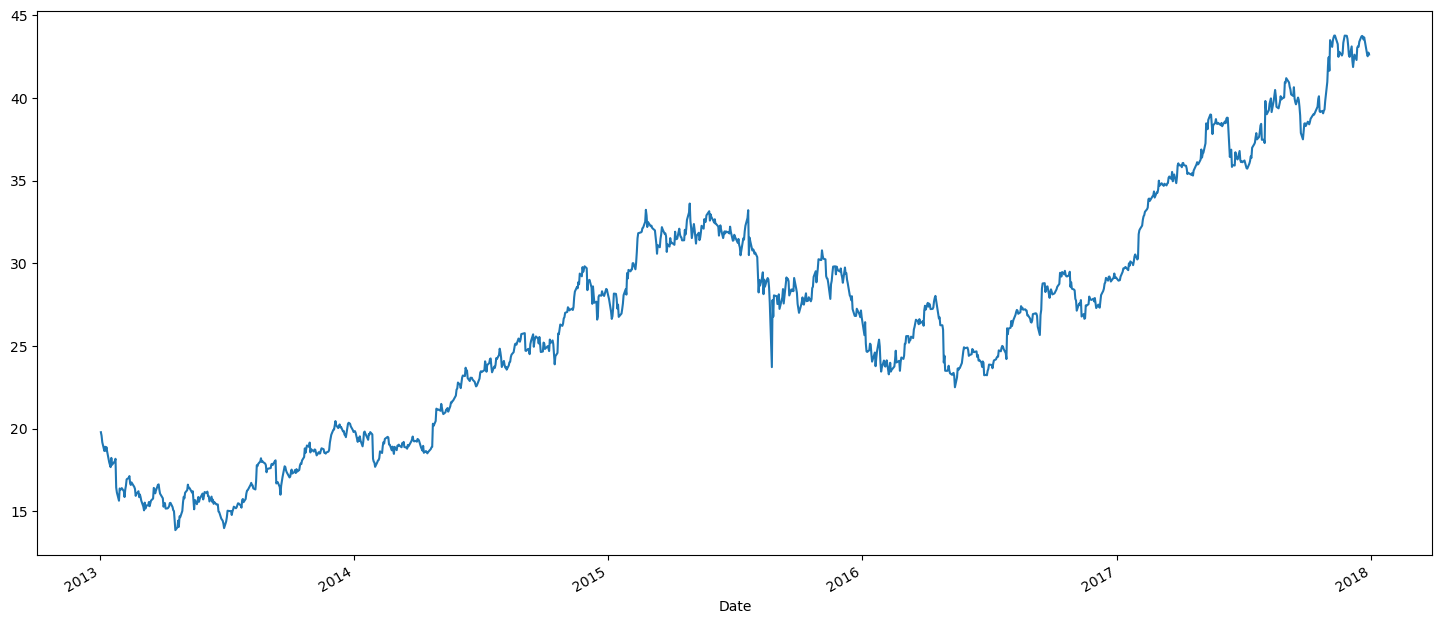

In [5]:
apple_training_data.Open.plot(figsize=(18, 8));

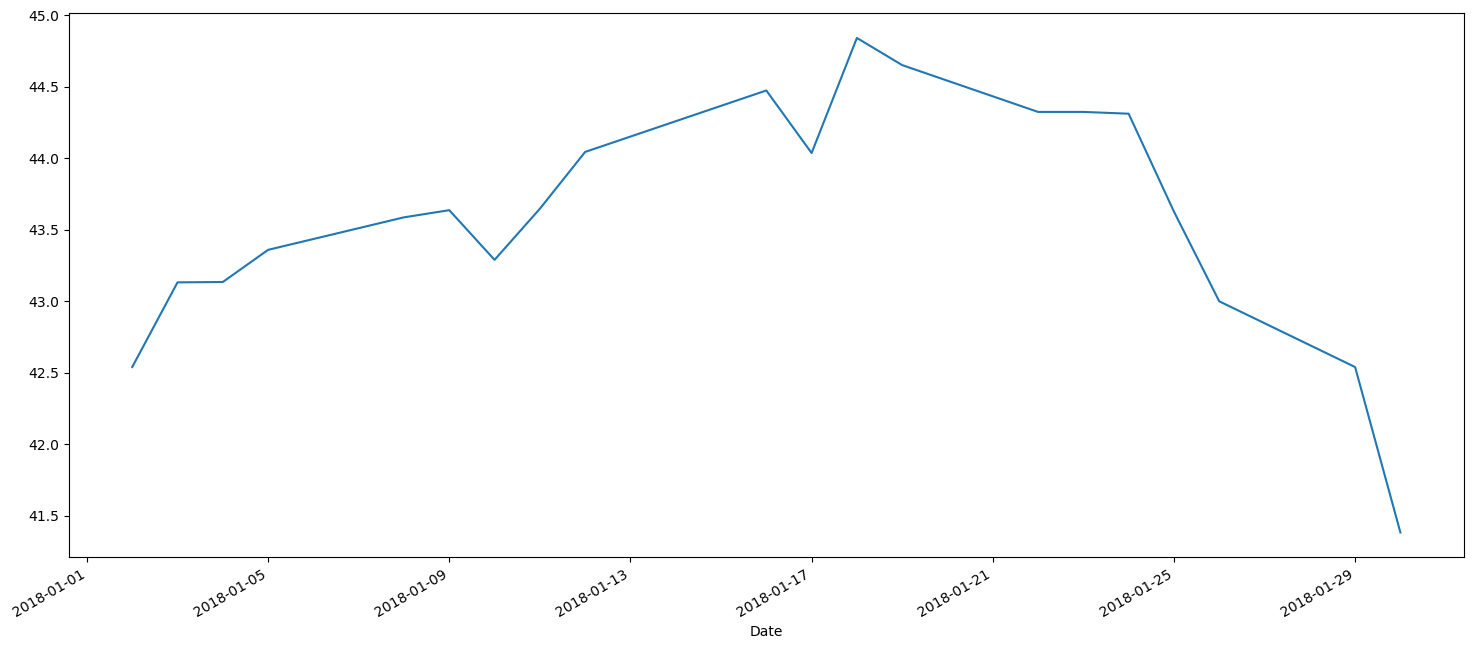

In [6]:
apple_testing_data.Open.plot(figsize=(18, 8));

In [7]:
train_set = apple_training_data.Open.values.reshape(-1, 1)
test_set = apple_testing_data.Open.values.reshape(-1, 1)

In [8]:
train_set

array([[19.77928543],
       [19.56714249],
       [19.17749977],
       ...,
       [42.52500153],
       [42.75      ],
       [42.63000107]])

In [9]:
# It is always a good idea to normalize or scale data when using neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = scaler.fit_transform(train_set)

In [10]:
train_set_scaled

array([[0.19795893],
       [0.19086893],
       [0.17784673],
       ...,
       [0.95814041],
       [0.96566006],
       [0.96164959]])

Convert Training Data to Correct Shape:
- Objective: Predict stock price at time T based on data from days T-60 to T-1.

Features and Labels:
- Features (inputs): Opening stock prices for the past 60 days.
- Labels (output): Stock price on the 61st day.

In [11]:
train_set_scaled.shape

(1259, 1)

In [12]:
# Initialize lists to store feature sets and labels
features_set, labels = [], []

# Loop over the training data to create feature sets and labels
for i in range(60, len(train_set_scaled)):
    # Append the past 60 days' data to the features_set
    features_set.append(train_set_scaled[i-60:i, 0])
    # Append the current day's data to the labels
    labels.append(train_set_scaled[i, 0])

In [13]:
features_set, labels = np.array(features_set), np.array(labels)

In [14]:
features_set.shape

(1199, 60)

In [15]:
labels.shape

(1199,)

In [16]:
# LSTM expects three-dimensional input: (samples, time steps, features).
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [39]:
# Fix seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Initialize the model
model = Sequential()

# Add the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer without return sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model and store the history for plotting
history = model.fit(features_set, labels, epochs=100, batch_size=32, verbose=1)

# If you get the following error: NotImplementedError: Cannot convert a symbolic Tensor 
# Run the following code in anaconda prompt: conda install numpy=1.19

Epoch 1/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0307
Epoch 2/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0047
Epoch 4/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0043
Epoch 7/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0039
Epoch 8/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0038
Epoch 9/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0037
Epoch 10/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0035
Epoch 11/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0034
Epoch 12/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0032
Epoch 13/100
38/38 [=====

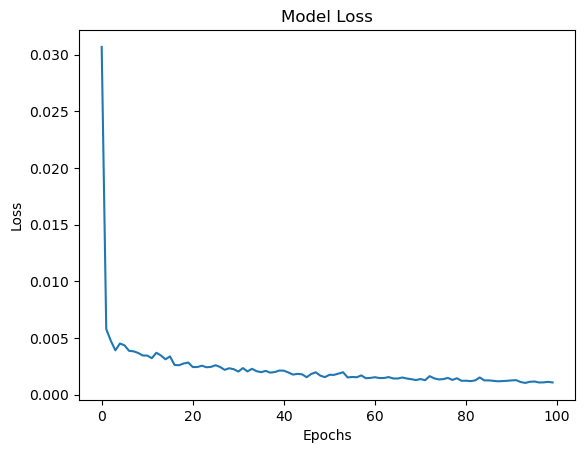

In [40]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [41]:
train_set_scaled

array([[0.19795893],
       [0.19086893],
       [0.17784673],
       ...,
       [0.95814041],
       [0.96566006],
       [0.96164959]])

In [68]:
# Fetch the last 60 days of training data
last_60_days_train = train_set[-60:]

# Concatenate the last 60 days of training data with the test data
test_inputs = np.concatenate((last_60_days_train, test_set), axis=0)

In [69]:
# Scale test inputs
test_set_scaled = scaler.transform(test_inputs)

# Prepare test features for prediction
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_set_scaled[i-60:i, 0])

# Convert test features to a numpy array and reshape for LSTM model
test_features = np.array(test_features)
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], 1)

In [70]:
test_features.shape

(20, 60, 1)

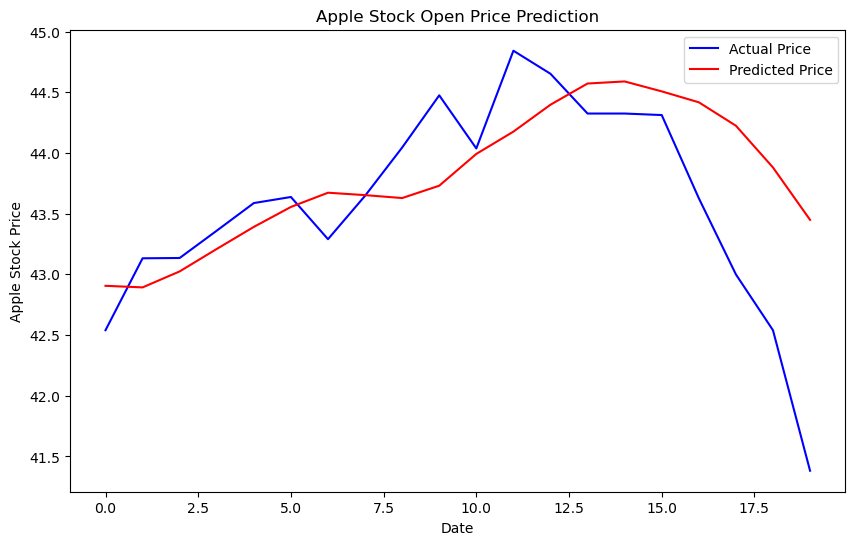

In [72]:
# Make predictions using the trained model
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_set, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Apple Stock Open Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [1]:
# Very interesting video about RNN: https://www.youtube.com/watch?v=AsNTP8Kwu80&ab_channel=StatQuestwithJoshStarmer
# Very interesting video about LSTM: https://www.youtube.com/watch?v=YCzL96nL7j0
# Interesting video about LSTM: https://www.youtube.com/watch?v=LfnrRPFhkuY
# https://towardsdatascience.com/animated-rnn-lstm-and-gru-ef124d06cf45
# https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/